# Práctica 1. K-Means y Agrupamiento aglomerativo

**José Emanuel Rodríguez Fitta**

# KMeans desde cero

Ejercicio 1. Con ayuda de las bibliotecas mostradas en la sesión (numpy, pandas, matplotlib y otras) implementar el algoritmo de K-means.

In [263]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

In [264]:
# Datos
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
data

array([[ 8. , 10. ],
       [ 3. , 10.5],
       [ 7. , 13.5],
       [ 5. , 18. ],
       [ 5. , 13. ],
       [ 6. ,  9. ],
       [ 9. , 11. ],
       [ 3. , 18. ],
       [ 8.5, 12. ],
       [ 8. , 16. ]])

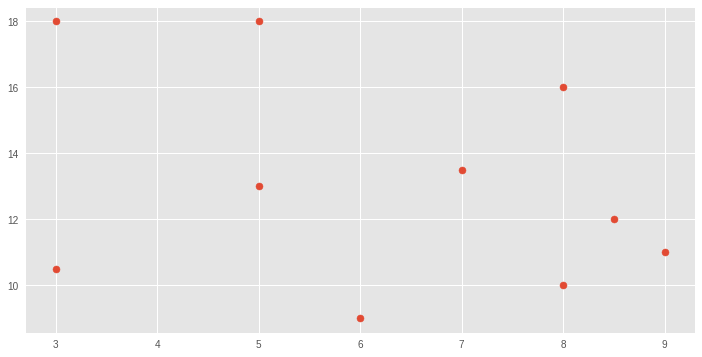

In [265]:
# Gráfica de los datos
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [266]:
class KMeansPropio():
  ''' 
  Mediante esta clase, se trata de recrear el algoritmo de clustering
  hecho con Scikit-Learn KMeans
  '''
  def __init__(self, data, random_state = 0):
    np.random.seed(random_state)
    # Creamos puntos iniciales de manera arbitraria
    self.C = np.array([
              [np.random.randint(1,10), np.random.randint(8,20)], 
              [np.random.randint(1,10), np.random.randint(8,20)]]) # Centroides iniciales de forma aleatoria
    
    self.predict = np.zeros(len(data)) # Variable donde guardaremos las predicciones hechas
    self.centros_clusters = np.array([[0, 0],
                                      [0, 0]]) # Variable donde almacenaremos los centros de clusters calculados
    self.data = data

  def dist(self, a, b, ax = 1):
    '''
    Función para calcular la distancia 
    entre los vectores a y b
    '''
    return np.linalg.norm(a-b, axis = ax)

  def clusters(self, C):
    '''
    Esta función crea un nuevo cluster 
    '''
    distances = []
    clusters = np.zeros(len(self.data))
  
    for i in range(len(self.data)):
      distance = self.dist(data[i], C) # Lista con las distancias del vector de data a los dos clusters iniciales
      # distances.append(distance)
      cluster = np.argmin(distance) # El indice con la distancia más pequeña entre el vector y cada uno de los clusters iniciales
      clusters[i] = cluster # Guardamos en clusters el indice cluster
  
    return clusters

  def centroids(self, C):
    '''
    Esta función nos  ayuda a calcular losnuevos centroides
    '''
    for i in range(len(C)):
      points = [self.data[j] for j in range(len(self.data)) if  self.clusters(C)[j] == i] # Junta todos los puntos de data que están en el cluster 0 y los que están en el cluster 1
      C[i] = np.mean(points, axis = 0) # Calcula el promedio de los puntos de cada cluster

    return C



  def fit(self):
    '''
    Función que nos ayuda a entrenar el modelo
    '''
    comprobador = 0

    centroids_iniciales = self.centroids(self.C)

    while comprobador == 0:
      centroids_nuevos = self.centroids(centroids_iniciales)
      if (np.array_equal(centroids_nuevos, centroids_iniciales)):
        comprobador += 1
      centroids_iniciales = centroids_nuevos 

    self.predict = self.clusters(centroids_nuevos)
    self.centros_clusters = centroids_nuevos

    return centroids_nuevos

  def grafica(self):
    '''
    Mediante esta función graficamos los clusters obtenidos
    '''
    fig, ax = plt.subplots()
    ax.scatter(self.data[:, 0], self.data[:, 1], c = self.predict, cmap = 'rainbow')
    ax.scatter(self.fit()[:, 0], self.fit()[:, 1], marker = '*', s = 200, c = 'green')
    plt.title('Clusters con KMeans \n Algoritmo propio')
    plt.show()  

### Algoritmo Propio

[0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
[[ 6 11]
 [ 5 17]]


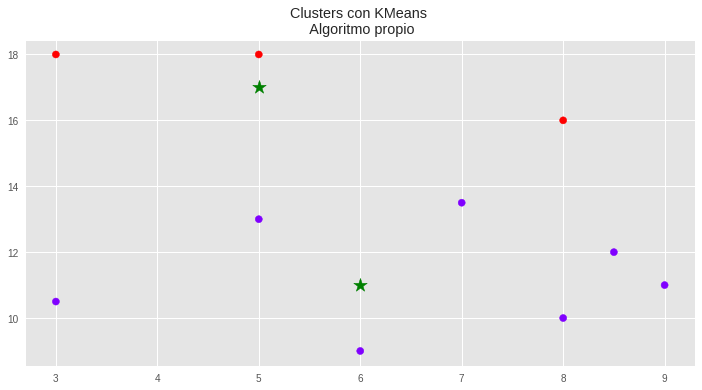

In [267]:
kmeans = KMeansPropio(data)
kmeans.fit()
print(kmeans.predict)
print(kmeans.centros_clusters)
kmeans.grafica()

### Algoritmo Scikit-Learn

In [268]:
from sklearn.cluster import KMeans
X = data
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_hat = kmeans.predict(X)
C_ = kmeans.cluster_centers_
C_

array([[ 5.33333333, 17.33333333],
       [ 6.64285714, 11.28571429]])

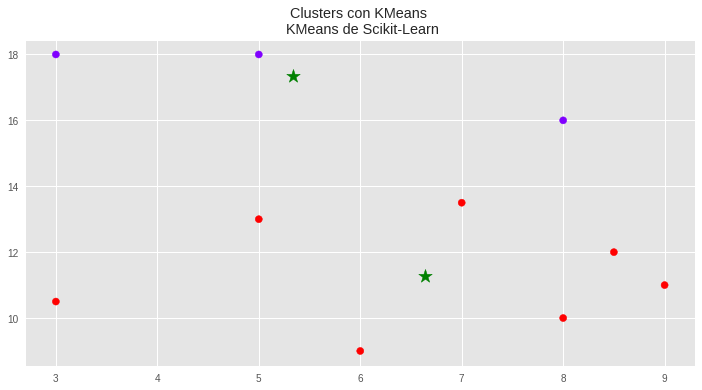

In [269]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y_hat, cmap = 'rainbow')
ax.scatter(C_[:, 0], C_[:, 1], marker = '*', s = 200, c = 'green')
plt.title('Clusters con KMeans \n KMeans de Scikit-Learn')
plt.show()

# Agrupamiento Jerárquico

Ejercicio 2. Seleccione un criterio de enlazamiento para el caso del agrupamiento aglomerativo e implementarlo usando las bibliotecas mencionadas anteriormente.

In [270]:
# Datos
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
data

array([[ 8. , 10. ],
       [ 3. , 10.5],
       [ 7. , 13.5],
       [ 5. , 18. ],
       [ 5. , 13. ],
       [ 6. ,  9. ],
       [ 9. , 11. ],
       [ 3. , 18. ],
       [ 8.5, 12. ],
       [ 8. , 16. ]])

In [271]:
class AgglomerativePropio():
  '''
  Clase creada para emular la clase AglommerativeClustering de Scikit-learn,
  esta clase admite un arreglo 2D de numpy, y tiene por defecto la distancia Euclideana,
  y el linkage es single.
  '''
  # Definimos el constructor de la clase con el parametro affinity por defecto 'euclideana'
  def __init__(self, data, affinity = 'euclideana'):

    if data.shape[1] != 2:
      print('Ingrese un arreglo 2D de numpy') # Nos aseguramos que se ingrese un arreglo 2D de numpy
    self.affinity = affinity
    self.data = data
    self.predict = np.zeros(len(data)) # Iniciamos un arreglo de ceros donde se guardarán las predicciones
    self.data_clusters = [[list( self.data[i] ) ] for i in range(len(self.data))] # Transformamos la data a 'clusters' (cada vector es un cluster)

  def dist_euclideana(self, x, y, ax = 0):
    '''
    Función para calcular la distancia euclidanea
    entre los vectores x y y
    '''
    return np.linalg.norm(np.array(x) - np.array( y ), axis = ax)

  def dist_manhattan(self, x, y):
    '''
    Función para calcular la distancia Manhattan
    entre los vectores x y y
    '''
    return np.array( [ np.sum( abs(np.array(x) - np.array(y))) ] )

  def criterio_simple(self, A, B):
    '''
    Esta función nos ayuda a calcular la distancia entre dos distintos clusters 
    considerando la distancia ( euclideana o manhattan ) mínima entre los clusters (linkage = 'single')
    '''
    matriz_distancias = np.zeros((len(A), len(B))) # Iniciamos una matriz donde guardaremos las distancias entre los vectores de A y B
    for i in range(len(A)):
      for j in range(len(B)):
        # Criterio para calcular la distancia
        if self.affinity == 'euclideana':
          matriz_distancias[i][j] = self.dist_euclideana(A[i], B[j])
        elif self.affinity == 'manhattan':
          matriz_distancias[i][j] = self.dist_manhattan(A[i], B[j])
       
    # Retornamos el minimo de las entradas de la matriz de distancias de acuerdo al criterio simple o complete
    return np.min( matriz_distancias )


  def matriz_distancias(self):
    matriz_distancias = np.zeros((len(self.data_clusters), len(self.data_clusters))) # Iniciamos una matriz donde guardaremos las distancias entre cada par de vectores de la data

    for i in range(len(self.data_clusters)):
      for j in range(len(self.data_clusters)):
        if j < i:
          # Rellenamos todo lo que este debajo de la diagonal con ceros (la diagonal por si sola tiene ceros, pues es donde se guarda la distancia del vector con el mismo)
          matriz_distancias[i][j] = 0.
        # En el triangulo superior guardamos la distancia entre los vectores i y j 
        else:
          # Si tenemos clusters de 1 solo elemento:
          if (len( self.data_clusters[i] ) == 1) & (len( self.data_clusters[j] ) == 1):
            # Criterio para calcular la distancia
            if self.affinity == 'euclideana':
              matriz_distancias[i][j] = self.dist_euclideana( self.data_clusters[i][0], self.data_clusters[j][0])
            elif self.affinity == 'manhattan':
              matriz_distancias[i][j] = self.dist_manhattan( self.data_clusters[i][0], self.data_clusters[j][0])
            
          # Si tenemos clusters de más de un elemento, utilizamos el criterio 'single' mediante la función criterio_simple
          else:
            matriz_distancias[i][j] = self.criterio_simple( self.data_clusters[i],  self.data_clusters[j] ) 

    # Reemplazamos los ceros con el valor máximo de la matriz
    max = np.max( matriz_distancias )
    for i in range(len(self.data_clusters)):
      for j in range(len(self.data_clusters)):
        if matriz_distancias[i][j] == 0.:
          matriz_distancias[i][j] = max

    # Obtenemos y regresamos el mínimo de la matriz y las coordenadas donde se encuentra. Las coordenadas nos indican que vectores son los que están a esa distancia mínima
    min = np.min(matriz_distancias)
    x, y = np.where( matriz_distancias == min)

    return x[0], y[0], min

  def new_clusters(self, x, y):
    '''
    Función que nos ayuda a la creación de un nuevo cluster 
    a apartir de los dos más cercanos y elimina estos últimos
    '''
    cluster = [] # Cluster vacio

    for i in range(len(self.data_clusters[x])):
      cluster.append( self.data_clusters[x][i] ) # Añadimos los elementos del primer cluster

    for j in range(len(self.data_clusters[y])):
        cluster.append(self.data_clusters[y][j] ) # Añadimos los elementos del segundo cluster

    # Eliminamos los clusters con los cuales creamos este último
    del(self.data_clusters[x])
    del(self.data_clusters[y - 1])
    self.data_clusters.append(cluster)

    return len(self.data_clusters)

  def fit(self, n_clusters = 2):
    '''
    Esta función nos ayuda a obtener los clusters finales
    la cantidad de estos está dada por el parámetro n_clusters que 
    por defecto tiene el valor 2
    '''
    l = len(self.data_clusters)

    # Iteramos hasta obtener el número de clusters deseado
    while l > n_clusters:
      x, y, min =  self.matriz_distancias() # Calculamos la matriz de distancias en cada iteración
      l = self.new_clusters(x, y) # Calculamos el nuevo cluster en cada iteración a apartir de los dos más cercanos y eliminamos estos

    # Creamos una lista con las predicciónes para cada valor de la data inicial
    classification = []
    for i in range(len(self.data)):
      for j in range(n_clusters):
        for k in range(len(self.data_clusters[j])):
          if (self.data[i][0] == self.data_clusters[j][k][0]) & (self.data[i][1] == self.data_clusters[j][k][1]):
            classification.append(j)

    self.predict = classification

  def graficar(self):
    '''
    Función para graficar los clusters finales
    '''
    plt.scatter(self.data[:, 0], self.data[:, 1], c = self.predict, s = 50, cmap = 'rainbow')
    plt.title('Clusters con la distancia {} \n Algoritmo propio'.format(self.affinity))
    plt.show()
  


### Distancia Euclideana 


#### Algoritmo creado distancia Euclideana 

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1]


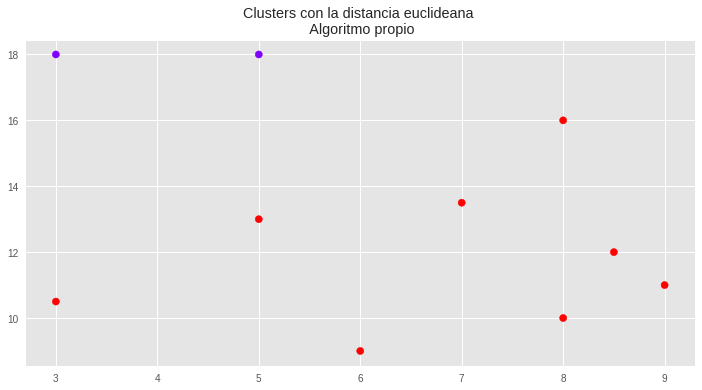

In [272]:
agg = AgglomerativePropio(data, affinity = 'euclideana')
agg.fit()
print(agg.predict)
agg.graficar()

#### Algoritmo Scikit-Learn distancia Euclideana

In [273]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y_hat = hc.fit_predict(data)

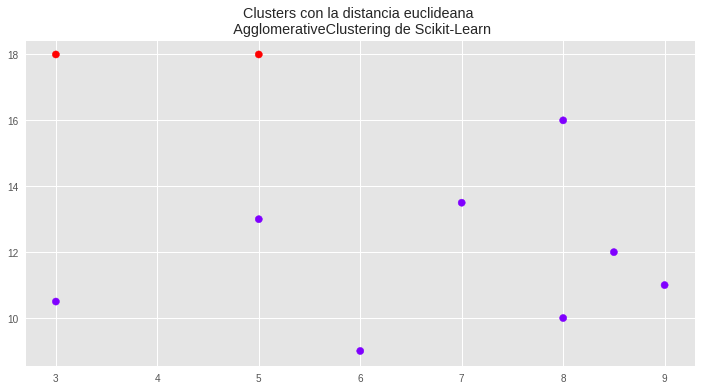

In [274]:
plt.scatter(data[:, 0], data[:, 1], c = y_hat, s = 50, cmap = 'rainbow')
plt.title('Clusters con la distancia euclideana \n AgglomerativeClustering de Scikit-Learn')
plt.show()

### Distancia Manhattan 

#### Algoritmo creado distancia Mahattan 

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1]


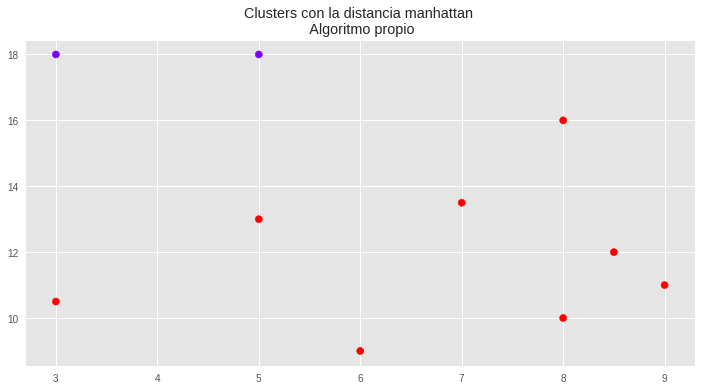

In [275]:
agg = AgglomerativePropio(data, affinity = 'manhattan')
agg.fit()
print(agg.predict)
agg.graficar()

#### Algoritmo Scikit-Learns distancia Mahattan

In [276]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage = 'single')
y_hat = hc.fit_predict(data)

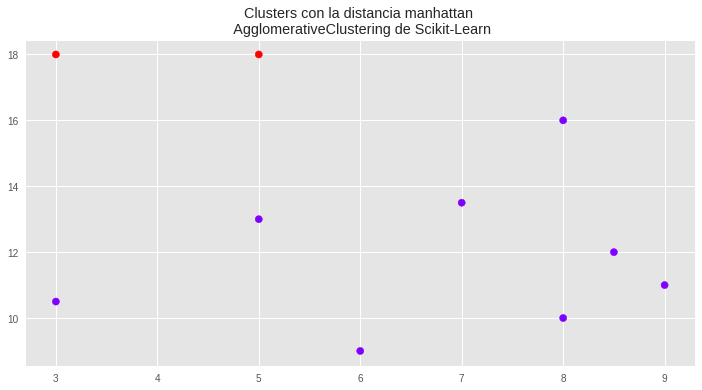

In [277]:
plt.scatter(data[:, 0], data[:, 1], c = y_hat, s = 50, cmap = 'rainbow')
plt.title('Clusters con la distancia manhattan \n AgglomerativeClustering de Scikit-Learn')
plt.show()

# Dataset Iris

Ejercicio 3. Aplicar los algoritmos **K-means**, **agrupamiento aglomerativo** y **mezclas gaussianas** incluidas en sklearn sobre el conjunto de datos *iris*, comparar los resultados obtenidos con cada uno de ellos.

In [278]:
# Carga de librerias y dependencias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
df_iris = pd.read_csv('/content/Iris.csv')
df_iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [280]:
df_iris.drop('Id', inplace = True, axis = 1) # Eliminamos la columnas Id

In [281]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No existen valores nulos en el dataset

In [282]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [283]:
df_iris[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [284]:
df_iris_numeric = df_iris.select_dtypes('float64').columns # Guardamos las variables que son númericas

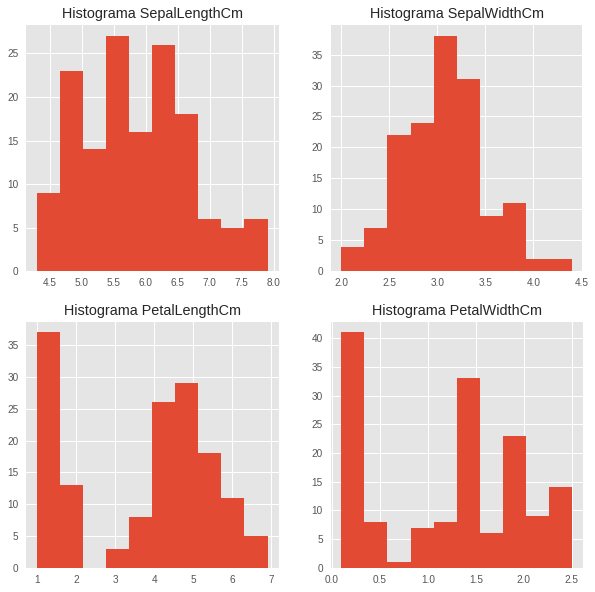

In [285]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
for i, (ax, column) in enumerate(zip(axes.ravel(), df_iris_numeric ) ):
  ax.set_title('Histograma {}'.format(column))
  ax.hist(df_iris[column])
plt.show()


Podemos observar que las variables **PetalLengthCm** y **PetalWidthCm** presentan una distribución bastante similar por lo que podemos inferir que existe correlación entre ellas.

In [286]:
def label_real(x):
    if x == 'Iris-setosa':
      return 0
    elif x == 'Iris-virginica':
      return 1
    elif x == 'Iris-versicolor':
      return 2

In [287]:
df = df_iris.copy()
df['label'] = df['Species'].apply(label_real)


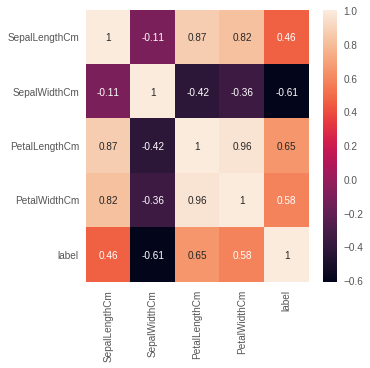

In [288]:
f, axis = plt.subplots( figsize  = ( 5, 5 ))
correlations = df.corr()
sns.heatmap(correlations, annot = True)
plt.show()

Existe una correlación fuerte entre **SepalLengthCm**, **PetalLengthCm**, **PetalWidthCm** y además entre **PetalLengthCm** y **PetalWidthCm**. Para evitar esta redundancia en las variables elegiremos las siguientes variables como predictores:


In [289]:
features = ['SepalWidthCm',  'PetalLengthCm', 'SepalLengthCm']

### KMeans

In [290]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy.cluster.hierarchy as sch


In [291]:
class Predictor():
  '''
  Clase creada para facilitar la creación de los distintos modelos
  es un predictor que crea modelos de acuerdo al parámetro 'model' ingresado:
  model = 'kmeans' Crea el modelo de K-medias
  model = 'jerarquico' Crea el modelo de Agglomerative Clustering con los parametros euclidean y ward
  model = 'gaussian' Crea el modelo de GaussianMixture (GMM)

  El parámetro transformador nos permite elegir entre distintos transformadores MinMaxScaler(), StandardScaler() y Normalizer()
  para comparar los distintos resultados
  '''
  def __init__(self, features, transformador = Normalizer(), model = 'kmeans'):
    # Parametros que se piden al crear el objeto Predictor
    self.features = features
    self.transformador = transformador
    self.model = model

    self.X = df_iris[ features ].values # Se toma por defecto el dataset iris ya previamente tratado
    self.tipos_labels = {} # Diccionario que nos permitira guardar para las distintas clases de iris una etiqueta de acuerdo a lo que se predijo
    self.predict = [0 for i in range(len(df_iris))] # Lista que nos permitirá guardar las predicciones hechas para cada modelo
    self.y = [] # Esta variable nos permitira guardar la columna Species codificada de acuerdo a las etiquetas del diccionario tipos_labels


  def calcular_clusters_optimos(self):
    '''
    Esta función nos permite graficar los distintos tipos de gráficas que permiten visualizar 
    el número óptimo de clusters para cada modelo considerado
    '''

    # Si el modelo es KMeans se gráfica el método del codo
    if self.model == 'kmeans':
      visualizer = KElbowVisualizer(KMeans(), k  = (1, 20), timing = True)
      visualizer.fit(self.X)
      plt.xlabel('Número de grupos')
      plt.ylabel('Distorsión')
      plt.show()

    # Si el modelo es jerarquico se gráfica el Dendrograma
    elif self.model == 'jerarquico':
      plt.figure(figsize = (10, 7))
      plt.title('Dendrograma')
      dend = sch.dendrogram(sch.linkage(self.X, method = 'ward'))
      plt.show()

    # Si el modelo es GMM  se graficará los criterior BIC y AIC
    elif self.model == 'gaussian':
      n_clusters = np.arange(1, 21)
      models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(self.X) for n in n_clusters]
      plt.plot(n_clusters, [m.bic(self.X) for m in models], label = 'BIC') # bic es el criterio Bayesiano
      plt.plot(n_clusters, [m.aic(self.X) for m in models], label = 'AIC') # aic es el criterio Akaike
      plt.legend()
      plt.xlabel('Número de grupos')
      plt.ylabel('Verosimilitud')
      plt.show()

  def fit_predict(self):
    '''Esta función nos permite entrenar el modelo y obtener las predicciones
    '''
    self.X = self.transformador.fit_transform(self.X) # Transformamos X de acuerdo al parametro introducido

    # Entrenamos el modelo de acuerdo al modelo que se desee y guardamos las predicciones en y_hat
    if self.model == 'kmeans':
      modelo = KMeans(n_clusters = 3)
      modelo.fit(self.X)
      y_hat = modelo.predict(self.X)
    elif self.model == 'jerarquico':
      modelo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
      y_hat = modelo.fit_predict(self.X)
    elif self.model == 'gaussian':
      modelo = GaussianMixture(n_components = 3)
      modelo.fit(self.X)
      y_hat = modelo.predict(self.X)

    df_iris_modelo = df_iris.copy() # Creamos una copia del dataset iris
    df_iris_modelo['label_prd'] = y_hat # Creamos una columna que tenga las etiquetas predichas para cada registro

    # Con las siguientes instrucciones obtendremos que etiqueta se debe asignar a cada tipo de iris 0, 1, 2. Dado que originalmente no se tienen estas etiquetas
    # por ser un algoritmo no supersivado es preciso hacer esto para poder compararlos en una matriz de confusión y tener una manera de medir las predicciones
    for tipo in list(df_iris_modelo['Species'].unique()):
      tipo_hoja = df_iris_modelo[df_iris_modelo['Species'] == tipo]['label_prd'].value_counts().to_frame().reset_index()
      label = tipo_hoja[tipo_hoja['label_prd'] == tipo_hoja['label_prd'].max()]['index'][0]
      self.tipos_labels[tipo] = label # Guardamos las etiquetas en el diccionario

    # Creamos una nueva columnas con las etiquetas asignadas de acuerdo a la clasificacion original
    df_iris_modelo['label_real'] = df_iris_modelo['Species'].apply(self.label_real)

    self.y = df_iris_modelo['label_real'] # Extraemos la columna con las etiquetas que deberían tener originalmente
    self.predict = y_hat # Guardamos en el atributo predict
    print('Accuracy {} '. format(accuracy_score(self.y, self.predict))) # Imprimimos la precisión entre las etiquetas originales y las predichas

  def matriz_confusion(self):
    '''
    Esta función nos ayudará a crear la matriz de confusión
    '''
    f, axis = plt.subplots( figsize  = ( 5, 5 ))
    sns.heatmap(confusion_matrix(self.y, self.predict), annot = True, cbar = None, cmap = "Blues")
    plt.title("Confusion Matrix"), 
    plt.tight_layout()
    plt.ylabel("True Class"), 
    plt.xlabel("Predicted Class")
    plt.show()

  def label_real(self, x):
    '''
    Esta función servirá como auxiliar en la asignación de las etiquetas que se deberían tener
    para cada tipo de iris de acuerdo al diccionario tipos_labels
    '''
    if x == 'Iris-setosa':
      return self.tipos_labels['Iris-setosa']
    elif x == 'Iris-virginica':
      return self.tipos_labels['Iris-virginica']
    elif x == 'Iris-versicolor':
      return self.tipos_labels['Iris-versicolor']


#### Features seleccionados

Accuracy 0.94 


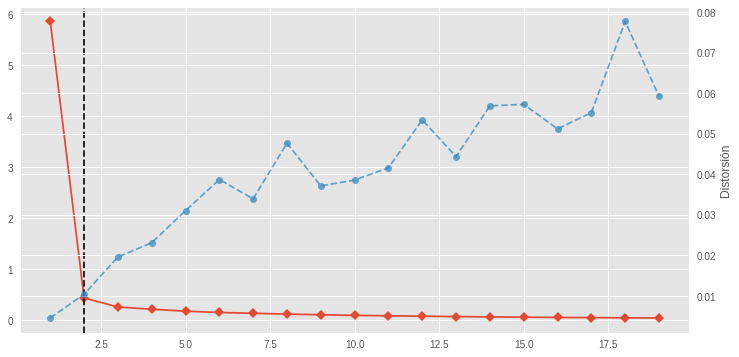

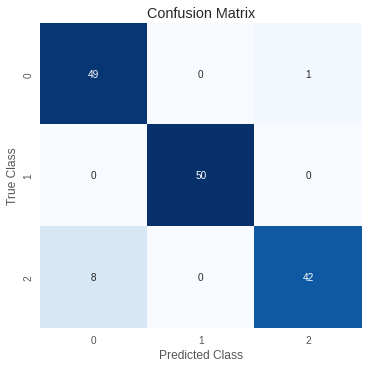

In [292]:
# kmeans y Normalizer
predictor = Predictor(features, transformador = Normalizer(), model = 'kmeans')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8333333333333334 


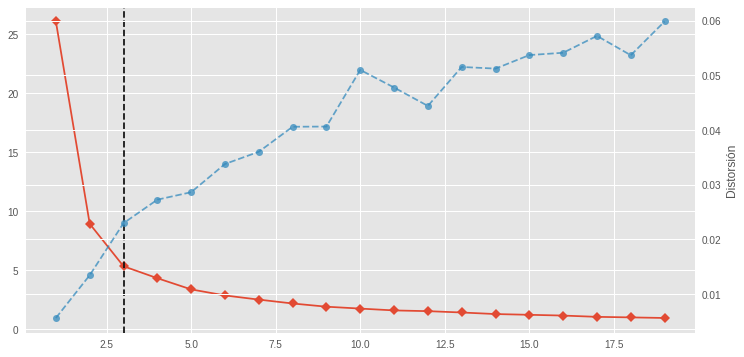

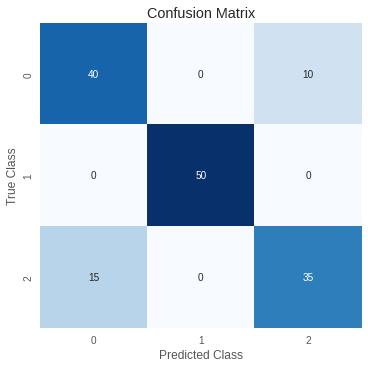

In [293]:
# kmeans y MinMaxScaler
predictor = Predictor(features, transformador = MinMaxScaler(), model = 'kmeans')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8066666666666666 


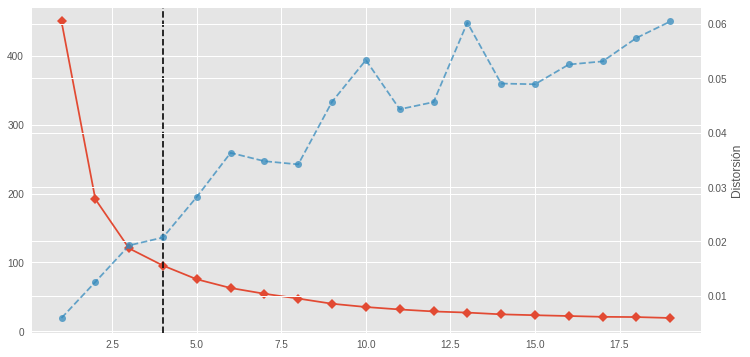

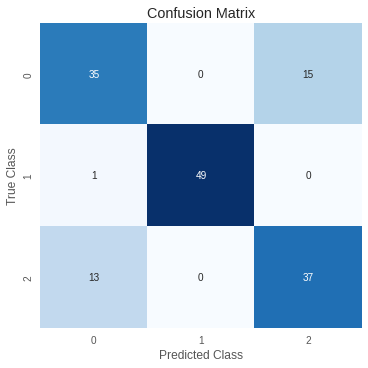

In [294]:
# kmeans y StandardScaler
predictor = Predictor(features, transformador = StandardScaler(), model = 'kmeans')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

#### Features originales

Accuracy 0.9666666666666667 


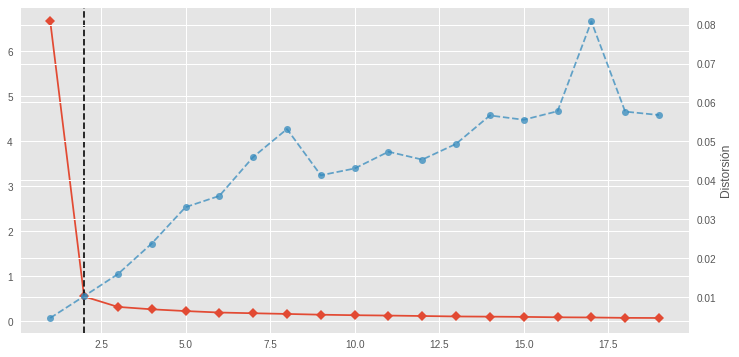

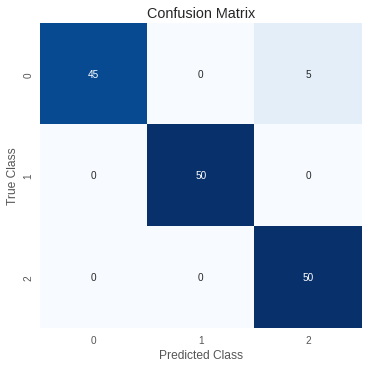

In [295]:
# kmeans y Normalizer
predictor = Predictor(df_iris_numeric, transformador = Normalizer(), model = 'kmeans')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8866666666666667 


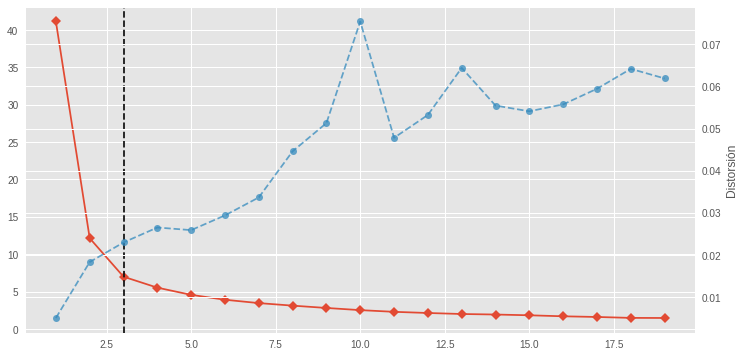

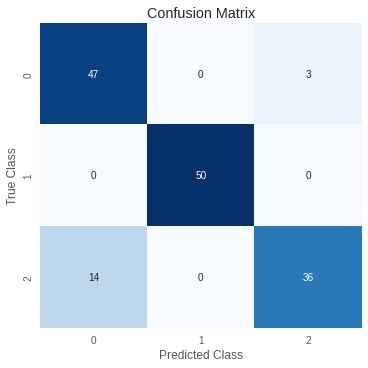

In [296]:
# kmeans y MinMaxScaler
predictor = Predictor(df_iris_numeric, transformador = MinMaxScaler(), model = 'kmeans')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8333333333333334 


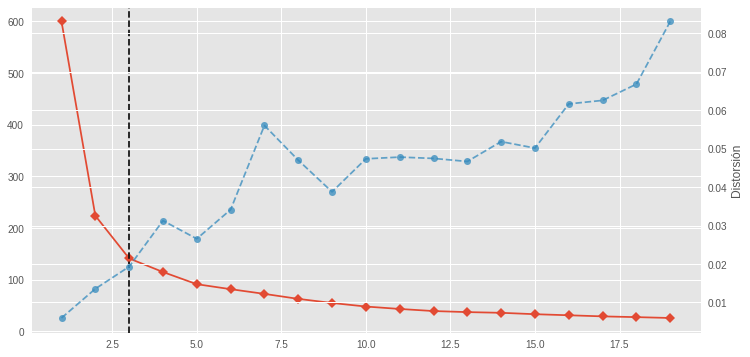

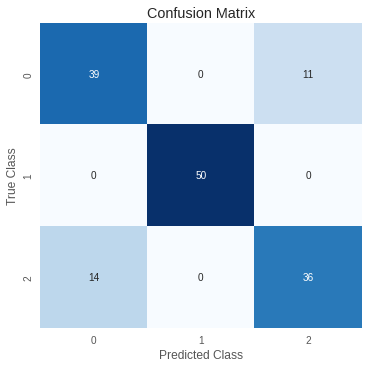

In [297]:
# kmeans y StandardScaler
predictor = Predictor(df_iris_numeric, transformador = StandardScaler(), model = 'kmeans')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

### Jerarquico

#### Features seleccionados

Accuracy 0.92 


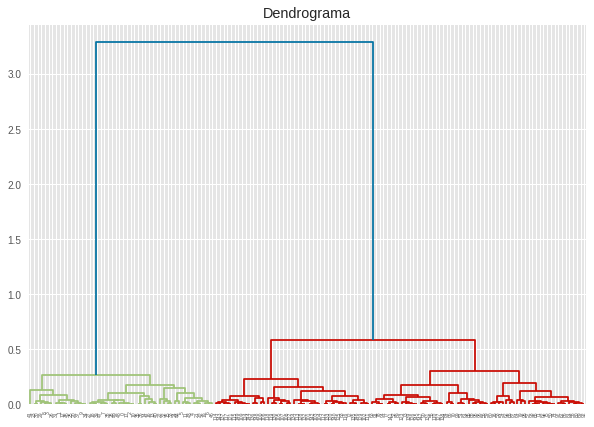

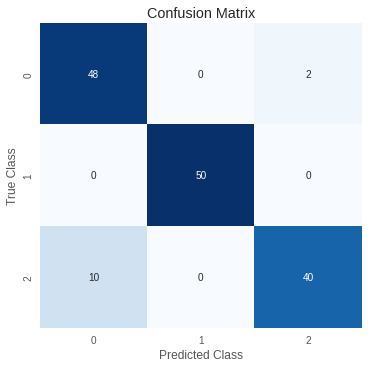

In [298]:
# jerarquico y Normalizer
predictor = Predictor(features, transformador = Normalizer(), model = 'jerarquico')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8066666666666666 


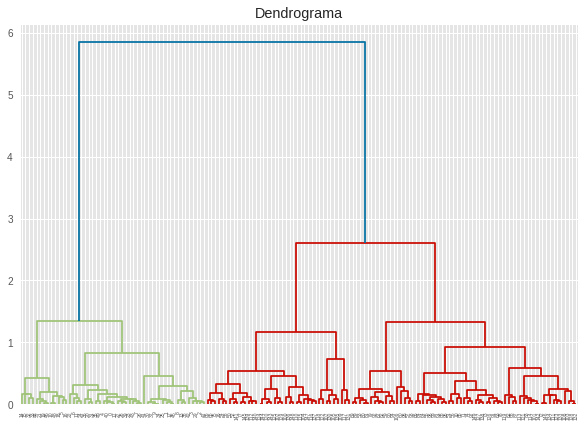

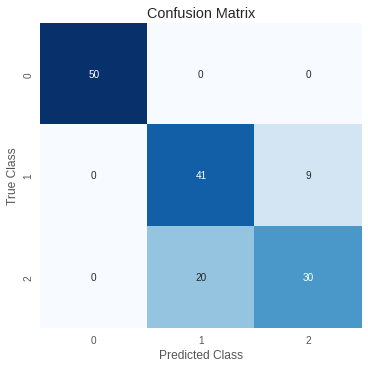

In [299]:
# jerarquico y MinMaxScaler
predictor = Predictor(features, transformador = MinMaxScaler(), model = 'jerarquico')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.7733333333333333 


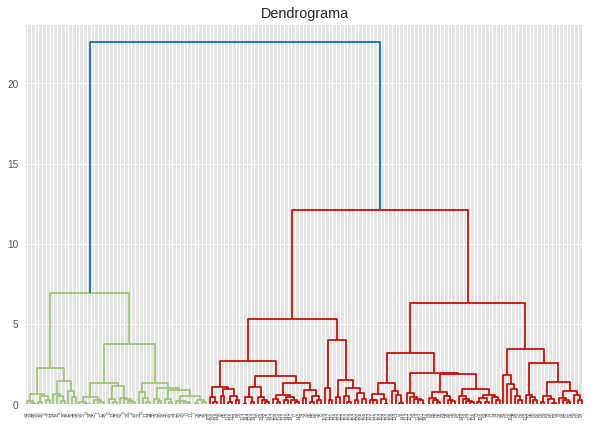

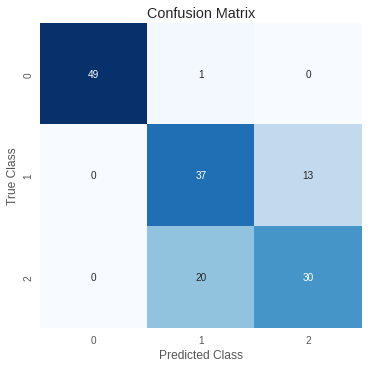

In [300]:
# jerarquico y StandardScaler
predictor = Predictor(features, transformador = StandardScaler(), model = 'jerarquico')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

#### Features originales

Accuracy 0.96 


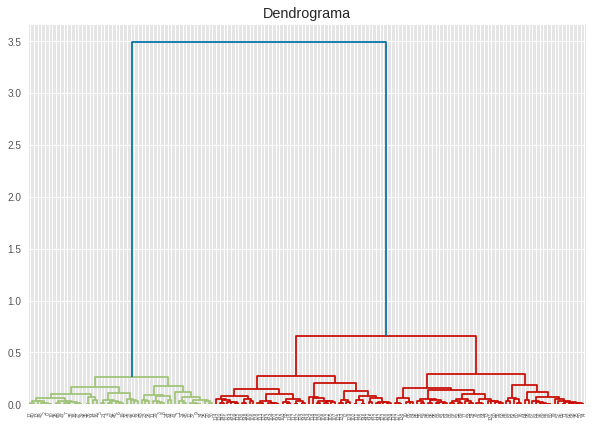

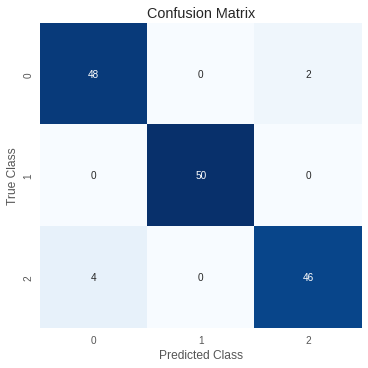

In [301]:
# jerarquico y Normalizer
predictor = Predictor(df_iris_numeric, transformador = Normalizer(), model = 'jerarquico')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8866666666666667 


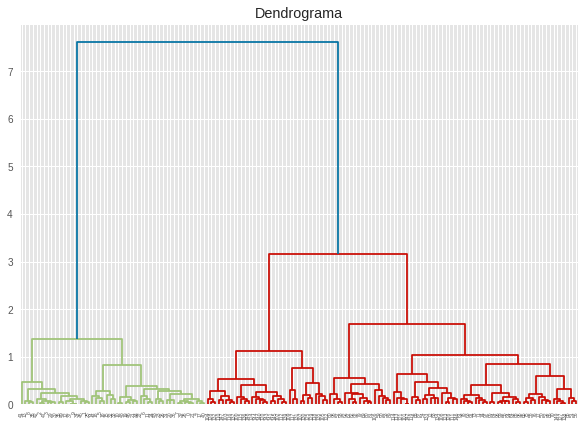

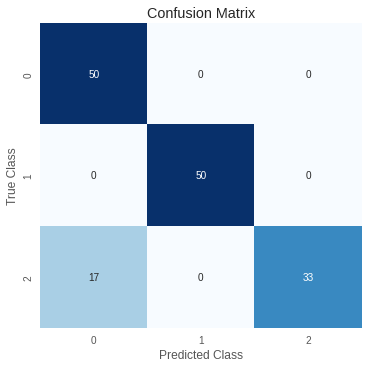

In [302]:
# jerarquico y MinMaxScaler
predictor = Predictor(df_iris_numeric, transformador = MinMaxScaler(), model = 'jerarquico')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8266666666666667 


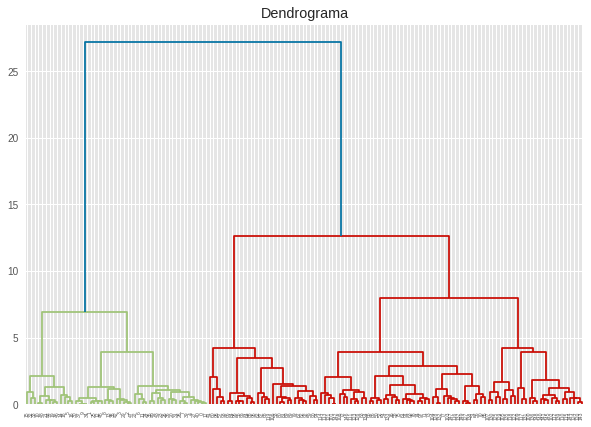

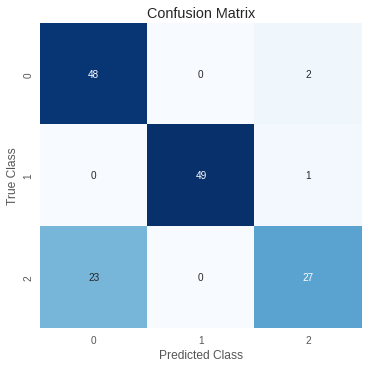

In [303]:
# jerarquico y StandardScaler
predictor = Predictor(df_iris_numeric, transformador = StandardScaler(), model = 'jerarquico')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

### Gaussian Mixture

#### Features seleccionados

Accuracy 0.8933333333333333 


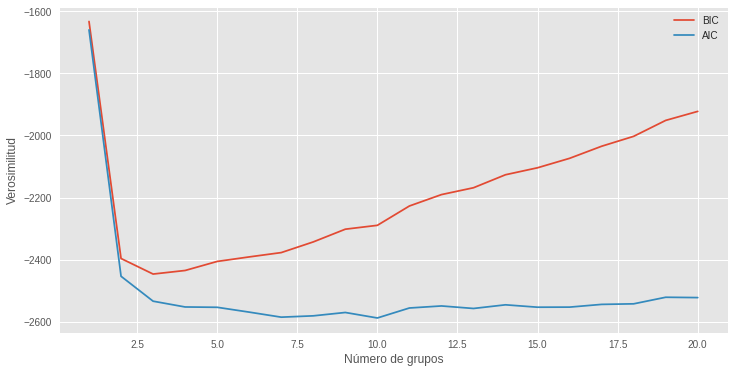

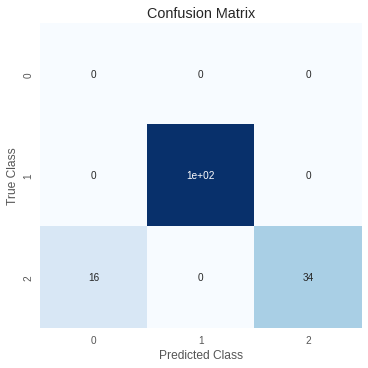

In [304]:
# gaussian y Normalizer
predictor = Predictor(features, transformador = Normalizer(), model = 'gaussian')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.8733333333333333 


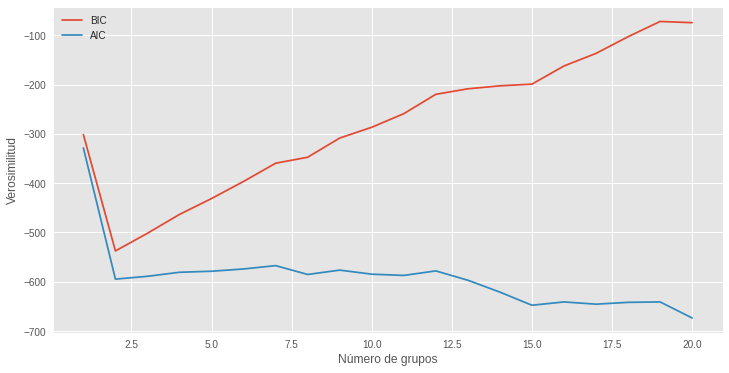

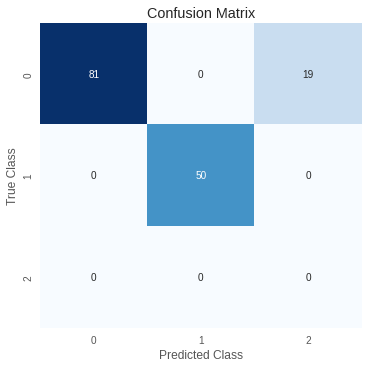

In [305]:
# gaussian y MinMaxScaler
predictor = Predictor(features, transformador = MinMaxScaler(), model = 'gaussian')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.92 


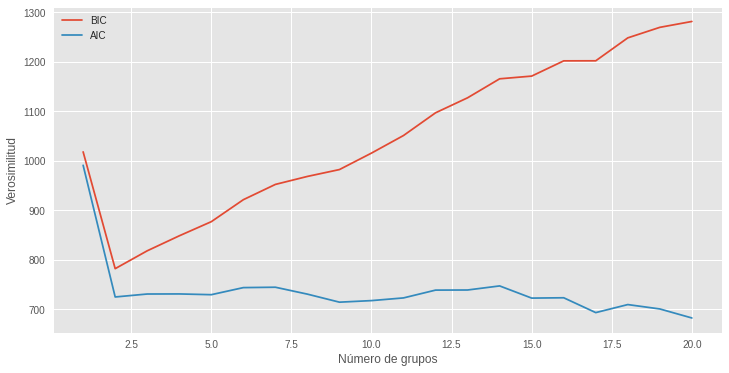

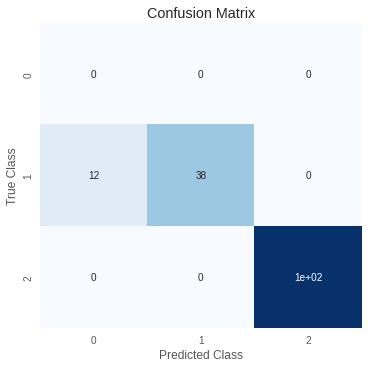

In [306]:
# gaussian y StandardScaler
predictor = Predictor(features, transformador = StandardScaler(), model = 'gaussian')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

#### Features originales

Accuracy 0.9666666666666667 


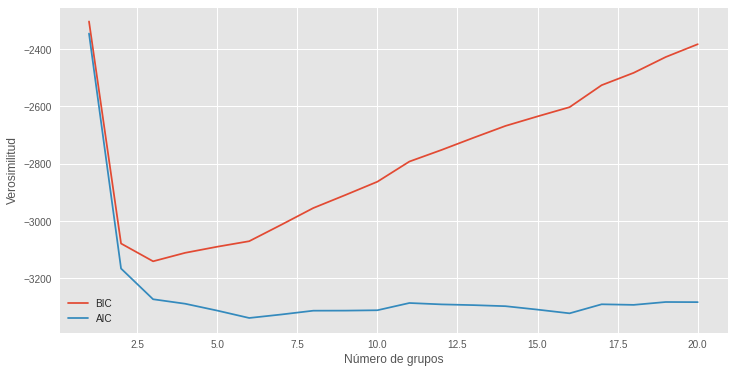

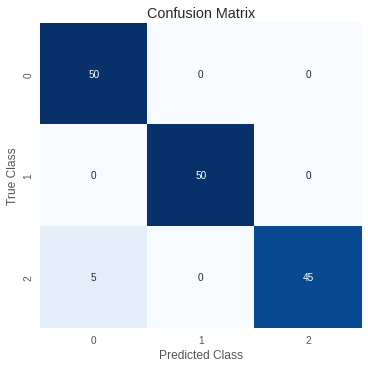

In [307]:
# gaussian y Normalizer
predictor = Predictor(df_iris_numeric, transformador = Normalizer(), model = 'gaussian')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.9666666666666667 


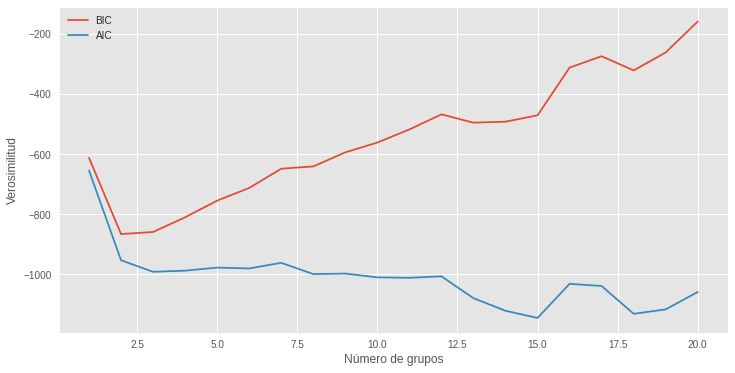

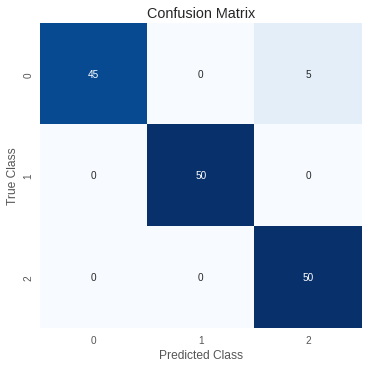

In [308]:
# gaussian y MinMaxScaler
predictor = Predictor(df_iris_numeric, transformador = MinMaxScaler(), model = 'gaussian')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

Accuracy 0.9666666666666667 


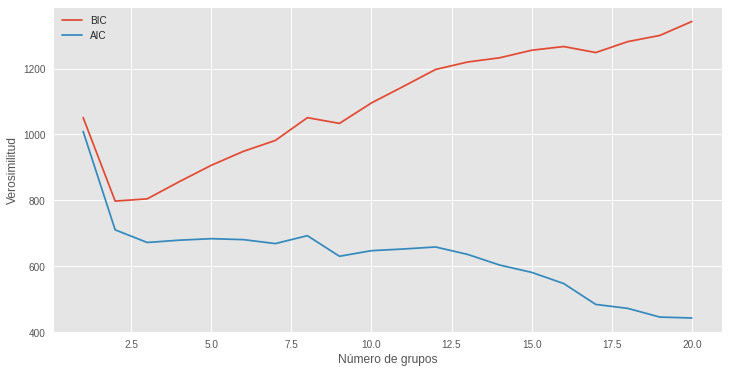

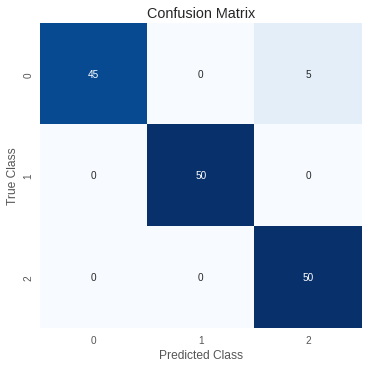

In [309]:
# gaussian y StandardScaler
predictor = Predictor(df_iris_numeric, transformador = StandardScaler(), model = 'gaussian')
predictor.fit_predict()
predictor.calcular_clusters_optimos()
predictor.matriz_confusion()

# Conclusiones


Ejercicio 4. Los códigos se entregarán vía Moodle del diplomado junto con una reflexión sobre los resultados obtenidos.

Del ejercicio realizado sobre el conjunto de datos Iris,  podemos observar que a pesar de existir redundancia entre las variables, los mejores modelos se obtuvieron cuando se consideraron las variables originales. Esto puede significar que cada una de ellas tienen un peso importante en la clasificación del tipo de Iris. Se pudieron construir diferentes modelos que obtuvieron una precisión del 96.6%. En particular el modelo de Mezclas Gaussianas con las variables originales y el modelo Kmeans con las variables originales y con el normalizador. Esto tiene sentido puesto que ambos algoritmos son bastante similares. Es interesante también notar que los algoritmos ya mencionados, los que arrojaron los mejores resultados, también nos dicen que el número óptimo de clusters es 2, distinto al que se conoce ya del dataset que es 3, esto puede ser, debido a que dos  de estas clases presentan bastantes similitudes en sus pétalos o en sus sépalos. Y quizá por esta razón, en estos mismos algoritmos al observar las respectivas matrices de confusión encontramos que las fallas en las predicciones están en solo una de las clases. Algo que también podemos notar es que en general las predicciones hechas con el modelo Jerarquico fueron las peores en cuanto a precisión.

Los primeros ejercicios, en lo personal, me parecieron bastante interesante, pues no solo aplicamos la receta que existe para aplicar los algoritmos, si no que al construirlo desde cero, pude entender su funcionamiento y como trabaja por dentro. En lo particular después de entender esto, decidí crear clases para cada uno, para intentar emular lo que hace scikit-learn, ejercicio que en realidad, me pareció muy interesante.